<a href="https://colab.research.google.com/github/VickIvanov/ML/blob/main/%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BA%D0%B0_%D1%85%D0%B0%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import numpy as np


print(tf.__version__)

2.3.0


### Получите данные
Сперва загрузим датасет.

In [ ]:
# dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path = "clients_new (2).csv"
# dataset_path = "clients1.csv"
dataset_path

'clients_new (2).csv'

Импортируем его при помощи библиотеки Pandas:

In [ ]:
column_names = ["client_id","age","gender_code","directory","amrg_eop","acsh_eop","acrd_eop","pcur_eop","pcrd_eop","psav_eop","pdep_eop","swork_s","tpos_s","retail_cost","auto_cost","calls_cost","communal_cost","gos_cost","personal_cost","shops_cost","rent_cost","contract_cost","transport_cost","building_cost","prof_cost","business_cost","constributions_cost","avia_cost","vendors_cost","hotels_cost","pleasure_cost","finance_cost","other_cost","transactions_count","clothes_cost","auto_count","calls_count","communal_count","gos_count","personal_count","shops_count","clothes_count","rent_count","contract_count","transport_count","building_count","prof_count","business_count","constributions_count","avia_count","vendors_count","hotels_count","pleasure_count","finance_count","other_count","retail_count"]
# column_names = ['client_id','age','gender_code','directory','aMRG_eop','aCSH_eop','aCRD_eop','pCUR_eop','pCRD_eop','pSAV_eop','pDEP_eop','sWork_S','tPOS_S']
raw_dataset = pd.read_csv(dataset_path, names=column_names, header=1, # decimal = ",", 
                          na_values="?", comment='\t',skipinitialspace=True, index_col="client_id") 


# Выпиливаем ID
# raw_dataset.pop('client_id')
# Выпиливаем город пока что
directory = raw_dataset.pop('directory')

dataset = raw_dataset.copy()
dataset.tail()

,age,gender_code,amrg_eop,acsh_eop,acrd_eop,pcur_eop,pcrd_eop,psav_eop,pdep_eop,swork_s,tpos_s,retail_cost,auto_cost,calls_cost,communal_cost,gos_cost,personal_cost,shops_cost,rent_cost,contract_cost,transport_cost,building_cost,prof_cost,business_cost,constributions_cost,avia_cost,vendors_cost,hotels_cost,pleasure_cost,finance_cost,other_cost,transactions_count,clothes_cost,auto_count,calls_count,communal_count,gos_count,personal_count,shops_count,clothes_count,rent_count,contract_count,transport_count,building_count,prof_count,business_count,constributions_count,avia_count,vendors_count,hotels_count,pleasure_count,finance_count,other_count,retail_count
client_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
998,49,М,0.00,1204003.78,0.0,45.00,56496.65,0.0,0.0,137305.88,165253.09,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,11039.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
999,45,Ж,0.00,655645.42,0.0,43.45,89718.27,0.0,380000.0,97142.73,216913.16,46052.07,0.0,0.0,6543.84,38054.0,0.0,60453.5,0.0,382.0,0.0,36966.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88,0.0,0,0,5,4,0,7,0,0,2,0,2,0,0,0,0,0,0,0,0,0,46
1000,36,Ж,1447907.05,0.00,0.0,1346.19,35468.03,0.0,0.0,105247.06,74871.63,60090.12,9089.7,0.0,2827.50,0.0,0.0,751.0,0.0,0.0,0.0,350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47,0.0,6,0,2,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30
1001,22,М,0.00,5000.00,0.0,10000.00,10000.00,50000.0,10000.0,50000.00,60000.00,13400.00,0.0,320.0,0.00,0.0,0.0,4100.0,0.0,0.0,2900.0,5200.0,750.0,0.0,0.0,0.0,0.0,0.0,8800.0,2000.0,1200.0,59,0.0,0,2,0,0,0,9,0,0,0,18,3,2,0,0,0,0,0,14,1,2,5
1002,22,М,0.00,5000.00,10000.0,10000.00,10000.00,50000.0,10000.0,50000.00,60000.00,13400.00,0.0,320.0,0.00,0.0,0.0,4100.0,0.0,0.0,2900.0,5200.0,750.0,0.0,0.0,0.0,0.0,0.0,8800.0,2000.0,1200.0,59,0.0,0,2,0,0,0,9,0,0,0,18,3,2,0,0,0,0,0,14,1,2,5


In [ ]:
dataset.isna().sum()
dataset = dataset.dropna()

Работа с возрастом

In [ ]:
gender = dataset.pop('gender_code')
dataset['gender'] = (gender == "М")* 1.0

Конвертирую долги в бинарные признаки

In [ ]:
ipoteka = dataset.pop('amrg_eop')
credcard = dataset.pop('acrd_eop')
loan = dataset.pop('acsh_eop')
dataset['ipoteka'] = (ipoteka > 0)* 1.0
dataset['credcard'] = (credcard > 0)* 1.0
dataset['loan'] = (loan > 0)* 1.0

Вид датасета после преобразований

In [ ]:

fullds = dataset.copy()
dataset.drop(dataset.tail(2).index,inplace=True)
dataset.tail()

,age,pcur_eop,pcrd_eop,psav_eop,pdep_eop,swork_s,tpos_s,retail_cost,auto_cost,calls_cost,communal_cost,gos_cost,personal_cost,shops_cost,rent_cost,contract_cost,transport_cost,building_cost,prof_cost,business_cost,constributions_cost,avia_cost,vendors_cost,hotels_cost,pleasure_cost,finance_cost,other_cost,transactions_count,clothes_cost,auto_count,calls_count,communal_count,gos_count,personal_count,shops_count,clothes_count,rent_count,contract_count,transport_count,building_count,prof_count,business_count,constributions_count,avia_count,vendors_count,hotels_count,pleasure_count,finance_count,other_count,retail_count,gender,ipoteka,credcard,loan
client_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
996,48,1500000.00,243169.83,263298.50,0.0,117428.00,90782.05,34007.07,0.0,5375.54,28998.95,4100.0,0.0,6994.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61,0.0,0,8,2,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0.0,0.0,0.0,1.0
997,51,0.00,70391.45,351.08,0.0,205222.71,83319.15,19354.58,855.0,0.00,0.00,0.0,0.0,9949.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2541.0,0.0,0.0,0.0,0.0,0.0,63,0.0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,0,41,1.0,1.0,0.0,0.0
998,49,45.00,56496.65,0.00,0.0,137305.88,165253.09,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,11039.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0
999,45,43.45,89718.27,0.00,380000.0,97142.73,216913.16,46052.07,0.0,0.00,6543.84,38054.0,0.0,60453.5,0.0,382.0,0.0,36966.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88,0.0,0,0,5,4,0,7,0,0,2,0,2,0,0,0,0,0,0,0,0,0,46,0.0,0.0,0.0,1.0
1000,36,1346.19,35468.03,0.00,0.0,105247.06,74871.63,60090.12,9089.7,0.00,2827.50,0.0,0.0,751.0,0.0,0.0,0.0,350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47,0.0,6,0,2,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,0.0,1.0,0.0,0.0


In [ ]:
predict = ["ipoteka", "credcard", "loan"]
train_dataset = {}
test_dataset = {}
train_stats = {}
for item in predict:
  ds = dataset.copy()
  train_dataset[item] = ds.sample(frac=0.8,random_state=0)
  test_dataset[item] = ds.drop(train_dataset[item].index)
  ts = train_dataset[item].describe()
  ts.pop(item)
  train_stats[item] = ts.transpose()
train_stats[item]

,count,mean,std,min,25%,50%,75%,max
age,799.0,42.065081,8.011944,24.00,36.000,41.00,48.000,66.00
pcur_eop,799.0,47270.812403,504877.725088,0.00,0.000,0.00,27.135,12920443.92
pcrd_eop,799.0,134928.923016,237402.755548,0.00,18782.700,54327.77,135494.040,2369252.75
psav_eop,799.0,98323.120150,501392.661866,0.00,0.000,0.00,0.000,9010640.91
pdep_eop,799.0,155409.600100,892792.685121,0.00,0.000,0.00,0.000,13592508.79
swork_s,799.0,194583.146746,207251.789348,50002.00,84379.090,130195.19,225591.185,2776219.82
tpos_s,799.0,132584.126657,149472.307657,50032.35,65928.210,91911.13,146245.140,3032845.47
retail_cost,799.0,33661.293954,38024.965301,0.00,16850.575,26415.11,40155.270,456622.00
auto_cost,799.0,8617.653467,19355.852152,0.00,0.000,3597.75,8515.735,301272.55
calls_cost,799.0,427.288385,2333.175849,0.00,0.000,0.00,0.000,39815.55


### Выпиливаем метки


In [ ]:
# train_labels = train_dataset.pop(predict)
# test_labels = test_dataset.pop(predict)
train_labels = {}
test_labels = {}
for item in predict:
  train_labels[item] = train_dataset[item].pop(item)
  test_labels[item] = test_dataset[item].pop(item)
train_dataset[item].tail()

,age,pcur_eop,pcrd_eop,psav_eop,pdep_eop,swork_s,tpos_s,retail_cost,auto_cost,calls_cost,communal_cost,gos_cost,personal_cost,shops_cost,rent_cost,contract_cost,transport_cost,building_cost,prof_cost,business_cost,constributions_cost,avia_cost,vendors_cost,hotels_cost,pleasure_cost,finance_cost,other_cost,transactions_count,clothes_cost,auto_count,calls_count,communal_count,gos_count,personal_count,shops_count,clothes_count,rent_count,contract_count,transport_count,building_count,prof_count,business_count,constributions_count,avia_count,vendors_count,hotels_count,pleasure_count,finance_count,other_count,retail_count,gender,ipoteka,credcard
client_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
119,45,9.28,150695.79,0.0,0.0,377847.49,170950.46,53160.72,5576.72,0.0,15896.31,1196.0,4400.0,10345.0,0.0,11193.0,3400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,74,0.0,4,0,3,3,1,2,0,0,3,1,0,0,0,0,0,0,0,0,0,0,32,1.0,0.0,0.0
466,38,0.00,56035.36,0.0,0.0,96505.49,295770.07,44565.90,2357.60,0.0,0.00,0.0,0.0,99.0,0.0,613.0,0.0,0.0,0.0,0.0,0.0,221655.0,0.0,0.0,0.0,1545.00,0.0,44,0.0,3,0,0,0,0,1,0,0,1,0,0,0,0,0,4,0,0,0,1,0,19,0.0,0.0,1.0
27,39,161.86,39539.98,0.0,0.0,113593.38,78493.10,30091.86,13319.52,0.0,0.00,703.5,0.0,0.0,0.0,6593.0,400.0,0.0,0.0,0.0,0.0,16854.0,0.0,0.0,0.0,0.00,0.0,84,0.0,8,0,0,3,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,36,1.0,0.0,1.0
112,47,159.37,9623.52,0.0,0.0,140342.00,237581.27,24736.55,3351.41,0.0,8735.00,1010.0,0.0,53653.7,0.0,6675.0,3700.0,50440.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,36940.24,0.0,101,0.0,2,0,1,1,0,10,0,0,20,2,4,1,0,0,0,0,0,0,2,0,15,0.0,0.0,1.0
151,38,0.00,89240.06,0.0,0.0,181077.97,246982.69,57654.59,46191.89,0.0,6398.81,1750.0,0.0,96141.0,0.0,5155.0,0.0,3040.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4398.00,0.0,93,0.0,2,0,5,1,0,37,0,0,20,0,1,0,0,0,0,0,0,0,1,0,12,0.0,0.0,1.0


### Нормализация


In [ ]:
train_dataset[item].gender.unique()

array([0., 1.])

In [ ]:
def norm(x, item):
  ts = train_stats[item]
  return (x - ts['mean']) / ts['std']
normed_train_data = {}
normed_test_data = {}
for item in predict:
  normed_train_data[item] = norm(train_dataset[item], item)
  normed_test_data[item] = norm(test_dataset[item], item)

## Модель

In [ ]:
def build_model(item):
  model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[len(train_dataset[item].keys())]),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
models = {}
for item in predict:
  models[item] = build_model(item)

In [ ]:
# model.summary()

Тест модели

In [ ]:
testitem = predict[0]
example_batch = normed_train_data[testitem][:10]
example_batch


,age,pcur_eop,pcrd_eop,psav_eop,pdep_eop,swork_s,tpos_s,retail_cost,auto_cost,calls_cost,communal_cost,gos_cost,personal_cost,shops_cost,rent_cost,contract_cost,transport_cost,building_cost,prof_cost,business_cost,constributions_cost,avia_cost,vendors_cost,hotels_cost,pleasure_cost,finance_cost,other_cost,transactions_count,clothes_cost,auto_count,calls_count,communal_count,gos_count,personal_count,shops_count,clothes_count,rent_count,contract_count,transport_count,building_count,prof_count,business_count,constributions_count,avia_count,vendors_count,hotels_count,pleasure_count,finance_count,other_count,retail_count,gender,credcard,loan
client_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
724,0.491132,-0.078781,0.678412,-0.196100,-0.174071,-0.383154,-0.282430,-0.145673,-0.352227,-0.183136,-0.068672,-0.218119,0.405874,0.004085,-0.06865,-0.391940,-0.206870,-0.276909,0.299403,-0.066077,-0.059598,0.256129,-0.091282,-0.091282,-0.128763,-0.183254,-0.172323,-0.408715,-0.079137,-0.567617,-0.227050,-0.284336,-0.456705,0.290852,0.273716,-0.058615,-0.173606,-0.514346,-0.346791,-0.449498,0.921743,-0.124242,-0.155519,0.835744,-0.306001,-0.306001,-0.020964,-0.080923,-0.329706,-0.743175,-1.459679,-0.668509,-1.302765
79,-0.008123,-0.093300,0.005188,-0.196100,-0.174071,2.934106,1.248093,0.400834,-0.007675,-0.183136,-0.213255,-0.121092,0.041323,-0.430673,-0.06865,-0.388832,2.015494,-0.164993,-0.082170,-0.066077,-0.059598,-0.091514,-0.091282,-0.091282,-0.069964,-0.157885,0.769667,-0.709142,-0.079137,-0.205954,-0.227050,-0.584844,0.242351,0.986633,-0.225028,-0.058615,-0.173606,-0.408782,4.636768,0.600645,0.328531,-0.124242,-0.155519,-0.327600,-0.306001,-0.306001,0.295076,0.026126,1.109830,-1.251365,0.684225,1.493995,0.766637
879,-1.880328,-0.093628,-0.470592,-0.170172,-0.174071,-0.020851,-0.115612,-0.046508,-0.406546,-0.120269,-0.111606,-0.096835,0.197394,-0.191085,-0.06865,2.110189,0.185312,-0.103888,-0.152333,-0.066077,-0.059598,-0.091514,-0.091282,-0.091282,-0.077383,-0.183254,-0.172323,1.139636,8.312643,-0.205954,0.717808,1.218206,0.242351,0.986633,0.024344,6.631837,-0.173606,2.019201,2.643344,0.075574,0.031925,-0.124242,-0.155519,-0.327600,-0.306001,-0.306001,0.611116,-0.080923,-0.329706,0.273205,0.684225,-0.668509,0.766637
615,0.865573,-0.093628,-0.224110,-0.196100,-0.174071,-0.391133,-0.460692,-0.203640,1.112429,-0.183136,-0.213255,0.283997,-0.265039,-0.481649,-0.06865,-0.391940,-0.206870,-0.276909,-0.163099,-0.066077,-0.059598,-0.091514,-0.091282,-0.091282,-0.153432,-0.183254,11.311866,0.353906,-0.079137,1.240700,-0.227050,-0.584844,0.242351,-0.404929,-0.474400,-0.058615,-0.173606,-0.514346,-0.346791,-0.449498,-0.264681,-0.124242,-0.155519,-0.327600,-0.306001,-0.306001,-0.337004,-0.080923,1.109830,1.797775,0.684225,1.493995,0.766637
905,0.116691,-0.093628,-0.166658,-0.143128,-0.174071,0.255890,0.110135,-0.167025,-0.107469,-0.183136,-0.167288,-0.218119,-0.265039,-0.414382,-0.06865,2.335253,-0.206870,3.356174,-0.163099,-0.066077,-0.059598,-0.091514,-0.091282,-0.091282,-0.144158,-0.183254,-0.172323,0.261467,-0.079137,0.155710,-0.227050,-0.284336,-0.456705,-0.404929,-0.225028,-0.058615,-0.173606,-0.408782,-0.346791,0.600645,-0.264681,-0.124242,-0.155519,-0.327600,-0.306001,-0.306001,-0.020964,-0.080923,-0.329706,0.688997,0.684225,-0.668509,0.766637
533,0.116691,-0.093628,-0.405806,-0.196100,-0.174071,-0.364039,-0.484191,-0.250401,-0.179681,-0.183136,-0.205594,-0.218119,-0.265039,0.247558,-0.06865,-0.391940,-0.206870,-0.276909,-0.163099,-0.066077,-0.059598,-0.091514,-0.091282,-0.091282,-0.153432,-0.183254,-0.172323,0.423235,-0.079137,1.602364,-0.227050,-0.284336,-0.456705,-0.404929,1.021832,-0.058615,-0.173606,-0.514346,-0.346791,-0.449498,-0.264681,-0.124242,-0.155519,-0.327600,-0.306001,-0.306001,-0.337004,-0.080923,-0.329706,1.104789,0.684225,-0.668509,0.766637
400,-0.632191,-0.086327,-0.268892,-0.196100,-0.174071,-0.375944,-0.227441,0.460326,-0.148774,-0.183136,-0.164223,0.035365,-0.265039,-0.490560,-0.06865,0.026045,-0.206870,-0

In [ ]:
example_result = models[testitem].predict(example_batch)
example_result

array([[0.4991391 ],
       [0.5425043 ],
       [0.52579916],
       [0.64155686],
       [0.5177075 ],
       [0.5256409 ],
       [0.5169443 ],
       [0.5140542 ],
       [0.543083  ],
       [0.5283813 ]], dtype=float32)

### Предсказание до обучения

In [ ]:
for item in predict:
  loss, mae, mse = models[item].evaluate(normed_test_data[item], test_labels[item], verbose=2)
  print("Testing set Mean Abs Error for "+item+" : {:5.2f}%".format(mae*100))

7/7 - 0s - loss: 0.2594 - mae: 0.5032 - mse: 0.2594
Testing set Mean Abs Error for ipoteka : 50.32%
7/7 - 0s - loss: 0.2910 - mae: 0.5245 - mse: 0.2910
Testing set Mean Abs Error for credcard : 52.45%
7/7 - 0s - loss: 0.2659 - mae: 0.5029 - mse: 0.2659
Testing set Mean Abs Error for loan : 50.29%


### Обучение


In [ ]:
# Выведем прогресс обучения в виде точек после каждой завершенной эпохи
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 200
history = {}

for item in predict:
  # print(normed_train_data[item], train_labels[item])
  print("\nTraining ", item)
  history[item] = models[item].fit(
    normed_train_data[item], train_labels[item],
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot()])
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
#                     validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


Training  ipoteka

....................................................................................................
....................................................................................................
Training  credcard

....................................................................................................
....................................................................................................
Training  loan

....................................................................................................
....................................................................................................

Визуализируйте процесс обучения модели используя статистику содержащуюся в объекте `history`.

In [ ]:
for item in predict:
  hist = pd.DataFrame(history[item].history)
  hist['epoch'] = history[item].epoch
  print(hist.tail())

         loss       mae       mse  val_loss   val_mae   val_mse  epoch
195  0.007825  0.007829  0.007825  0.081556  0.091536  0.081556    195
196  0.007825  0.007829  0.007825  0.081556  0.091530  0.081556    196
197  0.007825  0.007829  0.007825  0.081558  0.091524  0.081558    197
198  0.007825  0.007829  0.007825  0.081560  0.091521  0.081560    198
199  0.007825  0.007829  0.007825  0.081565  0.091526  0.081565    199
        loss       mae      mse  val_loss   val_mae   val_mse  epoch
195  0.00626  0.006267  0.00626  0.204881  0.221091  0.204881    195
196  0.00626  0.006267  0.00626  0.204900  0.221070  0.204900    196
197  0.00626  0.006267  0.00626  0.204931  0.221087  0.204931    197
198  0.00626  0.006267  0.00626  0.204949  0.221081  0.204949    198
199  0.00626  0.006267  0.00626  0.204975  0.221099  0.204975    199
         loss       mae       mse  val_loss   val_mae   val_mse  epoch
195  0.001565  0.001571  0.001565  0.189015  0.199392  0.189015    195
196  0.001565  0.0

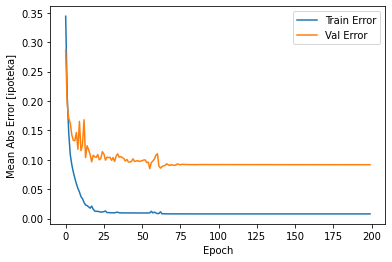

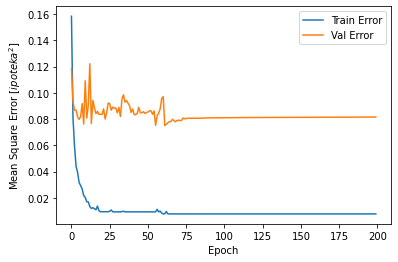

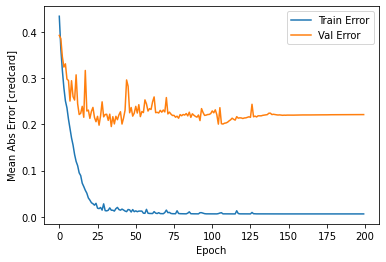

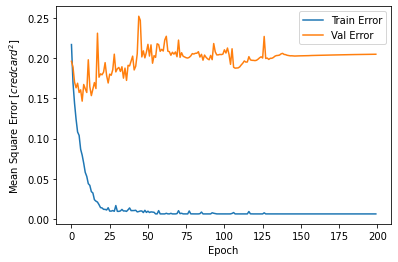

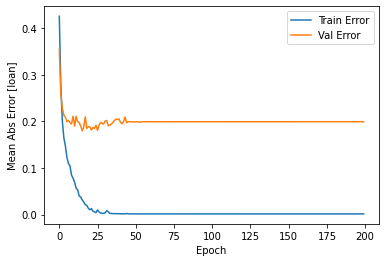

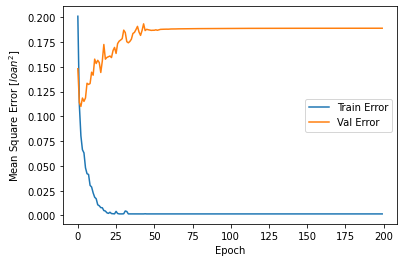

In [ ]:
def plot_history(history, item):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [%s]' % item)
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  # plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$%s^2$]' % item)
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  # plt.ylim([0,20])
  plt.legend()
  plt.show()

for item in predict:
  plot_history(history[item], item)

### Переучиваем с ограничением эпох


Training  ipoteka

.................

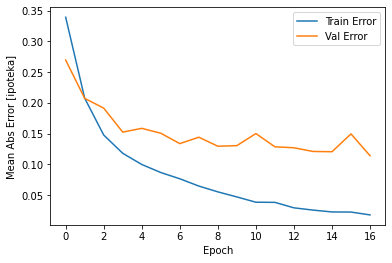

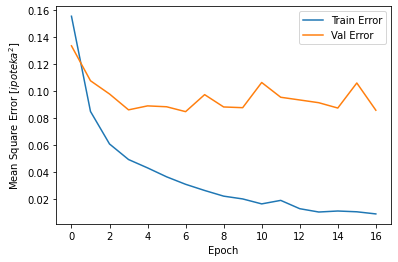


Training  credcard

................

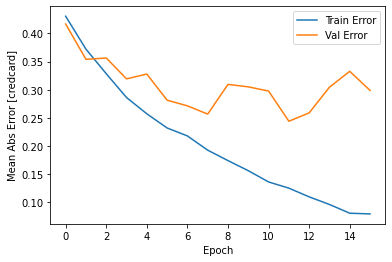

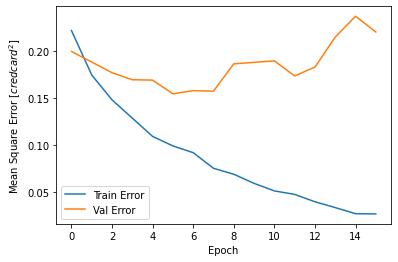


Training  loan

..............

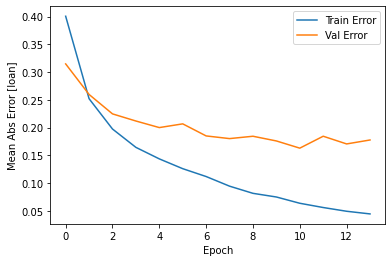

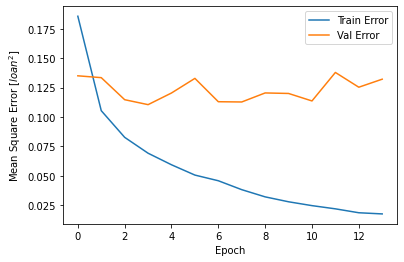

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
for item in predict:
  models[item] = build_model(item)
  print("\nTraining ", item)
  history[item] = models[item].fit(
    normed_train_data[item], train_labels[item],
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[early_stop, PrintDot()]) 
  plot_history(history[item], item)

In [ ]:
for item in predict:
  loss, mae, mse = models[item].evaluate(normed_test_data[item], test_labels[item], verbose=2)
  print("Testing set Mean Abs Error for "+item+" : {:5.2f}%".format(mae*100))

7/7 - 0s - loss: 0.1231 - mae: 0.1496 - mse: 0.1231
Testing set Mean Abs Error for ipoteka : 14.96%
7/7 - 0s - loss: 0.1917 - mae: 0.2679 - mse: 0.1917
Testing set Mean Abs Error for credcard : 26.79%
7/7 - 0s - loss: 0.1107 - mae: 0.1545 - mse: 0.1107
Testing set Mean Abs Error for loan : 15.45%


### Прогноз

In [ ]:
test_predictions = {}
for item in predict:
  test_predictions[item] = models[item].predict(normed_test_data[item]).flatten()
  # print(test_predictions)

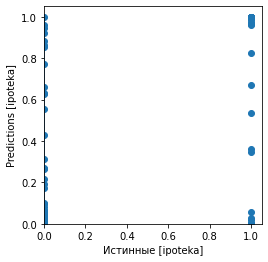

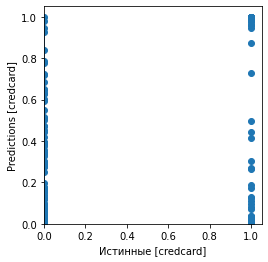

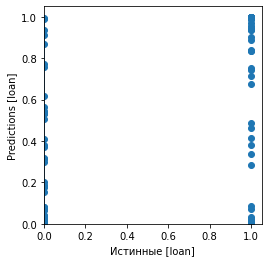

In [ ]:
for item in predict:
  plt.figure()
  plt.scatter(test_labels[item], test_predictions[item])
  plt.xlabel('Истинные [%s]' % item)
  plt.ylabel('Predictions [%s]' % item)
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0,plt.xlim()[1]])
  plt.ylim([0,plt.ylim()[1]])
  _ = plt.plot([-0, 0], [-1, 1])


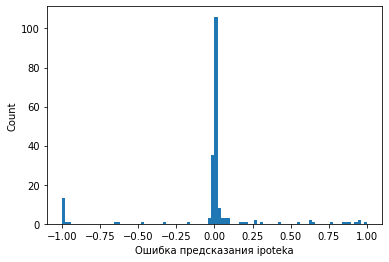

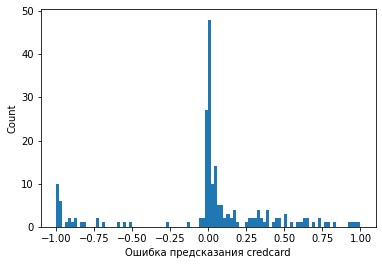

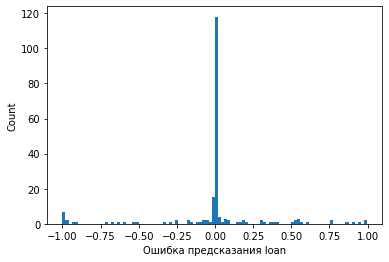

In [ ]:
for item in predict:
  error = test_predictions[item] - test_labels[item]
  plt.figure()
  plt.hist(error, bins = 100)
  plt.xlabel("Ошибка предсказания %s"%item)
  _ = plt.ylabel("Count")

Тест на себе

In [ ]:
me = fullds[999:]
for item in predict:
  metest = me.copy()
  metest.pop(item)
  normed = norm(metest, item)
  
  # print(normed)
  pred = models[item].predict(normed).flatten()
  print("Chance of %s is" % (item))
  print(pred)

Chance of ipoteka is
[7.952275e-05 6.895795e-08]
Chance of credcard is
[0.99109805 0.99109805]
Chance of loan is
[0.99400544 0.2165372 ]


Предсказание всего датасета и сохранение

In [ ]:
for item in predict:
  ds = fullds.copy()
  ds.pop(item)
  normed = norm(ds, item)
  pred = models[item].predict(normed)
  pred.tofile("predict_%s.csv" % item, sep='\n',format='%7.6f')
  # np.savetxt("predict_%s.csv" % item, pred, delimiter=",")

Сохранение модели

In [ ]:
for item in predict:
  models[item].save("model_%s.h5"%item)